In [1]:
# HIDDEN
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from myst_nb import glue

## An Exponential Approximation ##

The goal of this section is to understand how the chance of at least one collision behaves as a function of the number of individuals $n$, when there are $N$ hash values and $N$ is large compared to $n$. 

We know that chance is

$$
P(\text{at least one collision}) ~=~ 1 ~-~ \prod_{i=0}^{n-1} \frac{N-i}{N}
$$

While this gives an exact formula for the chance, it doesn't give us a sense of how the function grows. Let's see if we can develop an approximation that has a simpler form and is therefore easier to study.

The main steps in the approximation will be used repeatedly in this course, so we will set them out in some detail here.

In [2]:
# VIDEO: Approximate Chance of Collision
from IPython.display import YouTubeVideo

vid_approx_collide = YouTubeVideo("rUhunl890KM")
glue("vid_approx_collide", vid_approx_collide, display=False)

```{dropdown} See More
:icon: video
{glue:}`vid_approx_collide`
```

### Step 1: Only Approximate Terms that Need Approximation ###

While this might seem obvious, it's worth noting as it can save a lot of unnecessary fiddling. We are trying to approximate

$$
1 ~-~ \prod_{i=0}^{n-1} \frac{N-i}{N}
$$

so all we need to approximate is

$$
\prod_{i=0}^{n-1} \frac{N-i}{N}
$$

We can subtract the approximation from 1 at the end.

In other words, we'll approximate $P(\text{no collision})$ instead. 

### Step 2: Use $\log$ to Convert Products to Sums ###
Our formula is a product, but we are much better at working with sums. The `log` function helps us turn the product into a sum:

$$
\log (P(\text{no collision})) ~=~ \sum_{i=0}^{n-1} \log(\frac{N-i}{N})
$$

Once we have an approximation to $\log (P(\text{no collision}))$, we can use exponentiation to convert it to an approximation for what we want, which is $P(\text{no collision})$.

### Step 3: Use Properties of $\log$ ###
This is usually the step where the main calculation happens. Remember that $\log(1+x) \sim x$ for small $x$, where the symbol $\sim$ here means that the ratio of the two sides goes to 1 as $x$ goes to 0. The approximation might not be great for larger $x$ but let's try it out anyway.

$$
\begin{align*}
\log(P(\text{no collision})) ~ &=~ \sum_{i=0}^{n-1} \log(\frac{N-i}{N}) \\
&=~ \sum_{i=0}^{n-1} \log(1 - \frac{i}{N}) \\
&\sim ~ \sum_{i=0}^{n-1} (- \frac{i}{N}) \\
&=~ -\frac{1}{N} \sum_{i=0}^{n-1} i \\ \\
&= - \frac{1}{N} \cdot \frac{(n-1)n}{2}
\end{align*}
$$

by the formula for the sum of the first $n-1$ positive integers.

### Step 4: Invert as Needed to Complete the Approximation ###
The hard work has been done, and now we just have to clean things up. Step 3 gave us

$$
\log(P(\text{no collision})) ~\sim ~ - \frac{1}{N} \cdot \frac{(n-1)n}{2}
$$

and so by exponentiation on both sides we get

$$
P(\text{no collision}) ~\sim ~ 
e^{- (n-1)n/2N } ~ \sim ~ e^{-n^2/2N}
$$

Finally,

$$
P(\text{at least one collision}) ~\sim ~ 1 - e^{- (n-1)n/2N }
~ \sim ~ 1 - e^{-n^2/2N}
$$

Now you can see why the $P(\text{at least one collision})$ rises sharply as a function of the number of people. Remember that $N$ is fixed and $n$ varies between 1 and $N$. As $n$ increases, $(n-1)n$ increases fast, essentially like $n^2$. So $-n^2/2N$ decreases fast, which makes $e^{-n^2/2N}$ drop sharply; and that makes $1 - e^{-n^2/2N}$ shoot up.

It's worth noting that the main approxmation is in the middle of Step 3, where we use $\log(1+x) \sim x$ for small $x$. We will encounter this approximation several times in the course.

### How Good is the Approximation? ###
To see how the exponential approximation compares with the exact probabilities, let's work in the context of birthdays. You can change $N$ in the code if you prefer a different setting. 

To review the entire sequence of steps, we will redo our exact calculations and augment them with a column of approximations. We'll use the slightly more careful approximation of the two above.

In [3]:
# All of this code is from the previous section.

N = 365 

def p_no_match(n):
    individuals_array = np.arange(n)
    return np.prod((N - individuals_array)/N)

trials = np.arange(1, N+1, 1)
results = Table().with_columns('Trials', trials)
different = results.apply(p_no_match, 'Trials')

# Only the Exponential Approximation column is new

results = results.with_columns(
    'P(at least one match)', 1 - different,
    'Exponential Approximation', 1 - np.e**( -(trials - 1)*trials/(2*N) )
)

results

Trials,P(at least one match),Exponential Approximation
1,0,0
2,0.00273973,0.00273598
3,0.00820417,0.00818549
4,0.0163559,0.016304
5,0.0271356,0.0270254
6,0.0404625,0.0402629
7,0.0562357,0.0559104
8,0.0743353,0.0738438
9,0.0946238,0.0939222
10,0.116948,0.115991


The first 10 approximations look pretty good. Let's take a look at some more.

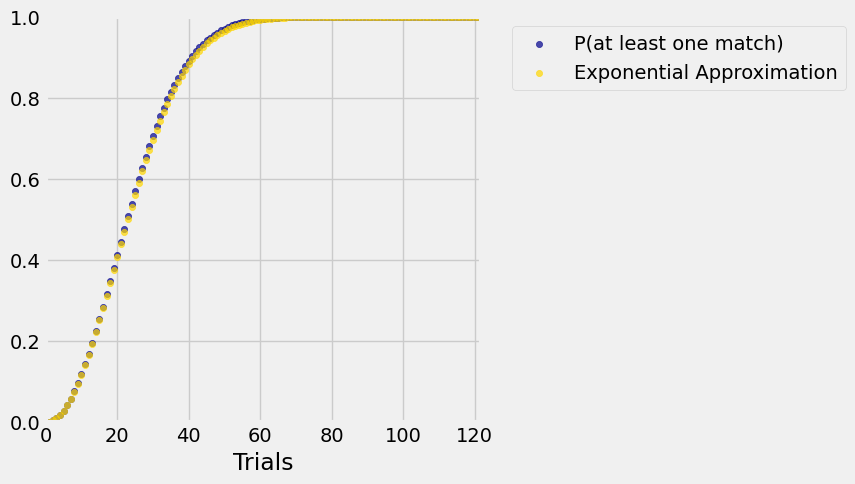

In [4]:
results.scatter('Trials')
plt.xlim(0, N/3)
plt.ylim(0, 1);

On the scale of this graph, the blue dots (the exact values) are almost indistinguishable from the gold (our exponential approximation). You can run the code again with the less careful approximation that replaces $(n-1)n$ by $n^2$ and see that the approximation is still excellent.

What we learn from the second form of the approximation is that the chance that there is at least one collision among the $n$ assigned values is essentially $1 - e^{-cn^2}$ where $c$ is a positive constant. 

We will encounter the function $1 - e^{-cx^2}$ again when we study the *Rayleigh distribution* later in the course.